<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/23_Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

#Data Generation

Discard this part, its just a code to make a sample circular data pattern

In [ ]:
alpha = np.linspace(0, 2*np.pi, 300)
x1 = 4 * np.cos(alpha) + 1 +np.random.random(300)
y1 = 4 * np.sin(alpha) + 3 +np.random.random(300)
l1 = np.ones(300)
x2 = np.cos(alpha) + 1 +np.random.random(300)
y2 = np.sin(alpha) + 4 +np.random.random(300)
l2 = np.zeros(300)

Data=pd.DataFrame([np.concatenate((x1,x2)),np.concatenate((y1,y2)), np.concatenate((l1,l2))]).T

#Data Visualization

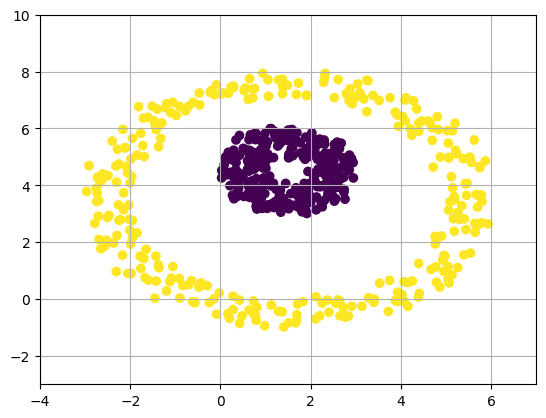

In [ ]:
plt.scatter(Data[0],Data[1],c=Data[2]) #last column has the label
plt.xlim([-4,7])
plt.ylim([-3,10])
plt.grid()

#Linear Classification

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       218
         1.0       0.71      0.53      0.61       202

    accuracy                           0.67       420
   macro avg       0.68      0.66      0.66       420
weighted avg       0.68      0.67      0.66       420

              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68        82
         1.0       0.77      0.49      0.60        98

    accuracy                           0.64       180
   macro avg       0.68      0.66      0.64       180
weighted avg       0.68      0.64      0.64       180



(-3.0, 10.0)

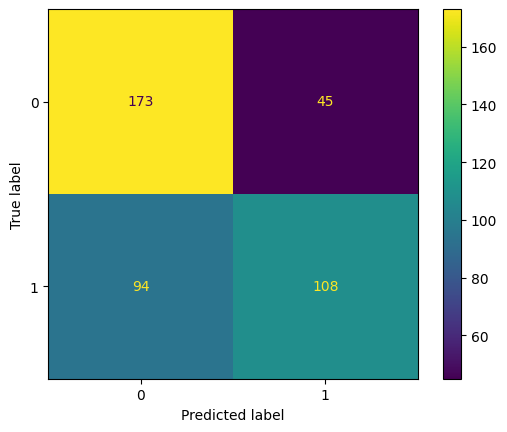

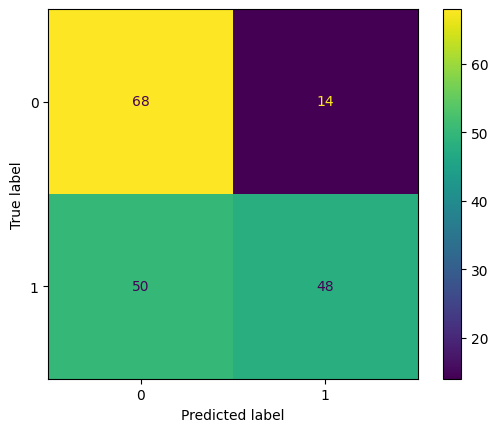

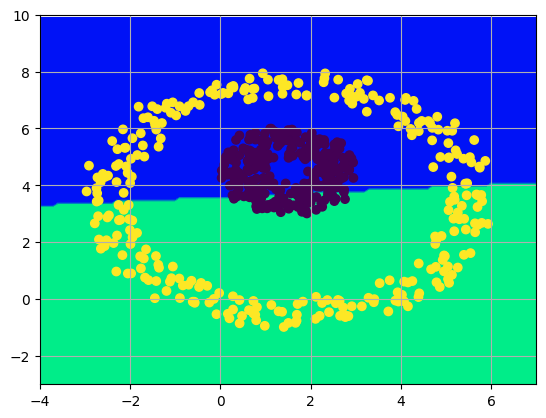

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(Data[[0,1]], Data[2], test_size=0.3, random_state=42)
Model=LogisticRegression()
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

plt.figure()
data_grid = np.array([np.meshgrid([np.arange(-10,10,0.1)],np.arange(-10,10,0.1))]).reshape(2, -1).T
plt.contourf(np.arange(-10,10,0.1),np.arange(-10,10,0.1),Model.predict(data_grid).reshape(np.arange(-10,10,0.1).shape[0],np.arange(-10,10,0.1).shape[0]),cmap='winter')
plt.scatter(Data[0],Data[1],c=Data[2])
plt.grid()
plt.xlim([-4,7])
plt.ylim([-3,10])

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

# Manual Feature Transformation

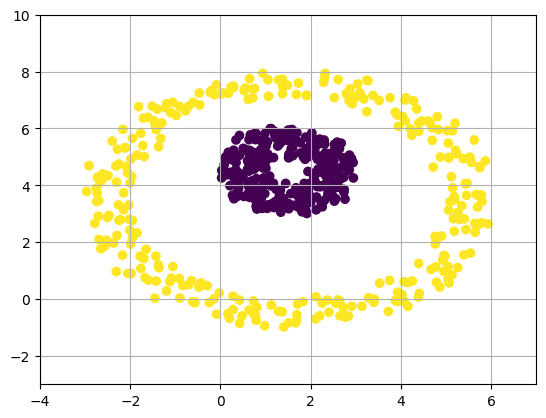

In [ ]:
plt.scatter(Data[0],Data[1],c=Data[2])
plt.xlim([-4,7])
plt.ylim([-3,10])
plt.grid()

In [ ]:
My_Feature1=(Data[0]-1)**2+((Data[1]-3)**2) # (r) c**2 = a**2 + b**2
My_Feature2=np.arctan((Data[1]-3)/(Data[0]-1)) # theta

Data_Transformed=pd.DataFrame([My_Feature1,My_Feature2]).T

<font color=red> Please note that this transformation is **non-linear**.</font>

In [ ]:
Data_Transformed.head()

,0,1
0,23.262458,0.091288
1,20.836872,0.232417
2,22.154048,0.050020
3,22.507971,0.137875
4,20.302814,0.144161


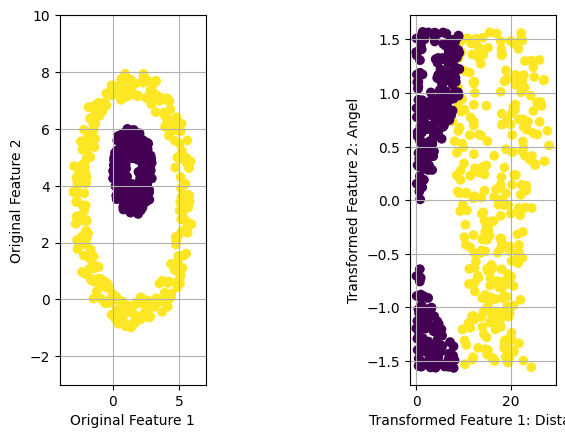

In [ ]:
plt.subplot(1,3,1)
plt.scatter(Data[0],Data[1],c=Data[2])
plt.xlim([-4,7])
plt.ylim([-3,10])
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.grid()
plt.subplot(1,3,3)
plt.scatter(Data_Transformed[0],Data_Transformed[1],c=Data[2])
plt.xlabel('Transformed Feature 1: Distance')
plt.ylabel('Transformed Feature 2: Angel')
plt.grid()

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       218
         1.0       0.98      0.98      0.98       202

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        82
         1.0       0.97      0.97      0.97        98

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



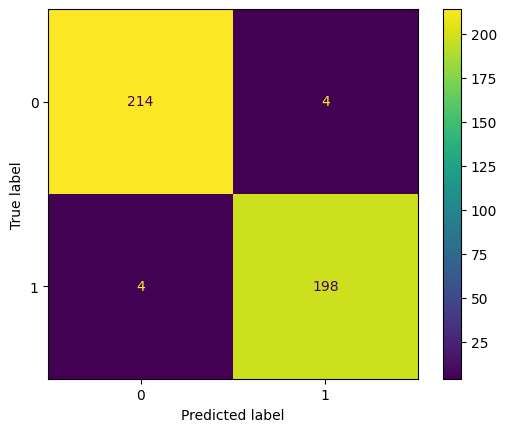

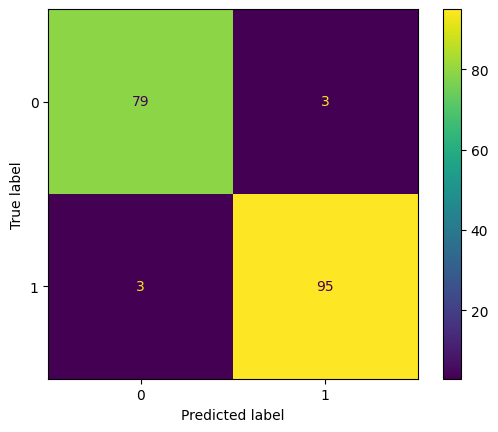

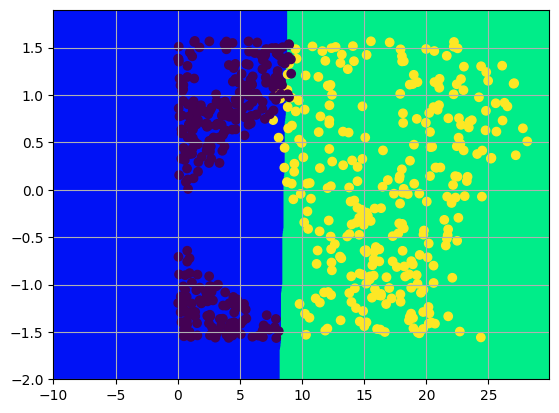

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(Data_Transformed, Data[2], test_size=0.3, random_state=42)


Model=LogisticRegression()
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

plt.figure()
data_grid = np.array([np.meshgrid([np.arange(-10,30,0.1)],np.arange(-2,2,0.1))]).reshape(2, -1).T
plt.contourf(np.arange(-10,30,0.1),np.arange(-2,2,0.1),Model.predict(data_grid).reshape(np.arange(-2,2,0.1).shape[0],np.arange(-10,30,0.1).shape[0]),cmap='winter')
plt.scatter(Data_Transformed[0],Data_Transformed[1],c=Data[2])
plt.grid()


#Pipeline

For testing a new data point,

1.  We first transform its features
2.  Give the transformed features to the trained Model
3.  Get the predicted class